In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

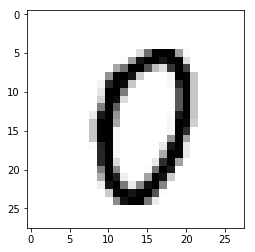

In [3]:
x = 255 - x_train[1000,:,:]
plt.imshow(x, cmap="gray")
plt.show()

In [4]:
# Normaliza el dataset de entrenamiento
#x_train = tf.keras.utils.normalize(x_train, axis=1)
# Normaliza el dataset de test
#x_test = tf.keras.utils.normalize(x_test, axis=1)
x_train, x_test = x_train/255.0 , x_test/255.0
ts=x_train.shape
x_train = x_train.reshape(ts[0], ts[1], ts[2], 1)
tt = x_test.shape
x_test = x_test.reshape(tt[0], tt[1], tt[2], 1)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(4, (5, 5), activation=tf.nn.relu, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(8, (4, 4), strides=(2, 2), activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(12, (4, 4), strides=(2, 2), activation=tf.nn.relu))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [6]:
optimizer = tf.keras.optimizers.Adam(decay=.0001)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
model.fit(x=x_train, y=y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 23s 380us/step - loss: 0.2152 - acc: 0.9353
Epoch 2/5
60000/60000 [==============================] - 21s 356us/step - loss: 0.0766 - acc: 0.9759
Epoch 3/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.0548 - acc: 0.9830
Epoch 4/5
60000/60000 [==============================] - 22s 364us/step - loss: 0.0425 - acc: 0.9865
Epoch 5/5
60000/60000 [==============================] - 22s 360us/step - loss: 0.0346 - acc: 0.9888


In [8]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
print 'Test accuracy:', test_acc*100, '%'

10000/10000 [==============================] - 2s 173us/step
Test accuracy: 98.6 %


In [9]:
predictions = model.predict([x_test])

3


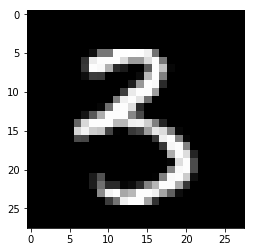

In [10]:
print np.argmax(predictions[5000])
plt.imshow(x_test[5000].reshape(28,28), cmap="gray")
plt.show()

Al entrenar y comenzar a hacer pruebas se observo que al ser entrenado todo con numeros en color blanco y fondo negro, no le era posible detectar numeros con otro fondo o color del digito, por ello la solucion propuesta es:

* Seleccionar 30.000 imagenes random de entrenamiento, invertir los colores y entrenar con mitad del dataset con fondo negro y digito blanco, y viceversa. 

(1, 28, 28, 1)

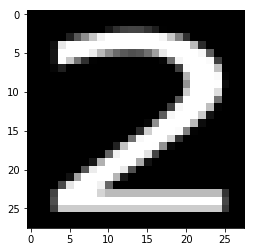

In [21]:
im = cv2.imread('asd9.png', cv2.IMREAD_GRAYSCALE)
#im[:] = 255 - im  # Hace el negativo
plt.imshow(im, cmap="gray")
im = cv2.resize(im, (28, 28))
im = im.reshape(1, 28, 28, 1)
im = im/np.float32(255)
im.shape


4


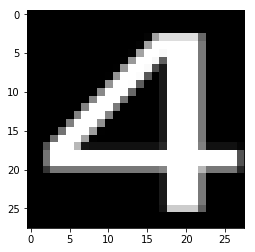

In [19]:
predictions = model.predict([im])
print np.argmax(predictions)
plt.imshow(im.reshape(28,28), cmap="gray")
plt.show()

In [ ]:
print(predictions)